# Titanic Data set Prediction Of Survival Using LogisticRegression

In [135]:
#importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import r2_score , accuracy_score
from sklearn.preprocessing import LabelEncoder , StandardScaler
from sklearn.metrics import confusion_matrix

In [121]:
#reading dataset
df = pd.read_csv('titanic.csv')
#displaying the whole
df
#dipalaying the necessary 4 rows
df.head()

,Unnamed: 0,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [122]:
#checking the data set types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   891 non-null    int64  
 1   PassengerId  891 non-null    int64  
 2   Survived     891 non-null    int64  
 3   Pclass       891 non-null    int64  
 4   Name         891 non-null    object 
 5   Sex          891 non-null    object 
 6   Age          714 non-null    float64
 7   SibSp        891 non-null    int64  
 8   Parch        891 non-null    int64  
 9   Ticket       891 non-null    object 
 10  Fare         891 non-null    float64
 11  Cabin        204 non-null    object 
 12  Embarked     889 non-null    object 
dtypes: float64(2), int64(6), object(5)
memory usage: 90.6+ KB


In [123]:
#checking for  null values
df.isnull().sum()

Unnamed: 0       0
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [124]:
#getting count q1 q2 q3 sum
df.describe()

,Unnamed: 0,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,445.000000,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,222.500000,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,445.000000,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,667.500000,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,890.000000,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [125]:
#filling with missing values with arbitary value
df = df.fillna(value = '0')
df.head()

,Unnamed: 0,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,0,S
1,1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,0,S
3,3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,0,S


In [126]:
#dropping unusefull coloumns
deletcol = ['Age','Name','Ticket','Cabin','Parch','PassengerId','Unnamed: 0']
X = df.drop(deletcol, axis = 1)
X.head()

,Survived,Pclass,Sex,SibSp,Fare,Embarked
0,0,3,male,1,7.2500,S
1,1,1,female,1,71.2833,C
2,1,3,female,0,7.9250,S
3,1,1,female,1,53.1000,S
4,0,3,male,0,8.0500,S


In [127]:
#converting the categorical value to numerical
le = LabelEncoder()
data_coloumn = ['Sex','Embarked']
for column in data_coloumn :
  X[column] = le.fit_transform(X[column])
X.head()

,Survived,Pclass,Sex,SibSp,Fare,Embarked
0,0,3,1,1,7.2500,3
1,1,1,0,1,71.2833,1
2,1,3,0,0,7.9250,3
3,1,1,0,1,53.1000,3
4,0,3,1,0,8.0500,3


In [128]:
#making target
y = X[['Survived']]
y.head()

,Survived
0,0
1,1
2,1
3,1
4,0


In [129]:
#dropping the survived coloumn for prediction
X = X.drop('Survived',axis=1)
X.head()

,Pclass,Sex,SibSp,Fare,Embarked
0,3,1,1,7.2500,3
1,1,0,1,71.2833,1
2,3,0,0,7.9250,3
3,1,0,1,53.1000,3
4,3,1,0,8.0500,3


In [130]:
#making test train split
X_train ,X_test , y_train , y_test = train_test_split(X , y , random_state = 24 , test_size = 0.4)
X_train.shape ,X_test.shape , y_train.shape , y_test.shape

((534, 5), (357, 5), (534, 1), (357, 1))

In [131]:
#making the model
model = LogisticRegression()
model = model.fit(X_train ,y_train.to_numpy().flatten())

In [132]:
#predicting the values
y_predict = model.predict(X_test)
y_predict

array([0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1,

In [133]:
#accuracy score
print("accuracy score : ",accuracy_score(y_test , y_predict))

accuracy score :  0.8011204481792717


In [136]:
#confusion matrix
con_mat = confusion_matrix(y_test , y_predict)
con_mat

array([[189,  36],
       [ 35,  97]])

<Axes: >

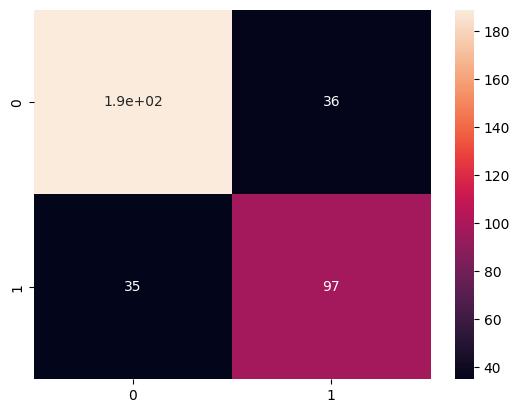

In [138]:
#heat map
import seaborn as sns
sns.heatmap(con_mat , annot = True)